In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from nltk.corpus import wordnet
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities, asyn_fluidc

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [3]:
open('sochiAD.csv')
#open('sochiBL.csv')
#open('sochiEX.csv')

<_io.TextIOWrapper name='sochiAD.csv' mode='r' encoding='cp1252'>

In [4]:
import codecs
with codecs.open("sochiAD.csv", "r",encoding='utf-8', errors='ignore') as file_data:
     sochiAD_raw = pd.read_csv(file_data)

In [5]:
sochiAD_raw['source'] = sochiAD_raw.source.astype(str)
sochiAD_raw['target'] = sochiAD_raw.target.astype(str)
#sochiBL_raw['source'] = sochiBL_raw.source.astype(str)
#sochiBL_raw['target'] = sochiBL_raw.target.astype(str)
#sochiEX_raw['source'] = sochiEX_raw.source.astype(str)
#sochiEX_raw['target'] = sochiEX_raw.target.astype(str)

In [6]:
sochiAD_raw['source'] = sochiAD_raw['source'].apply(lambda x:x.lower())
sochiAD_raw['target'] = sochiAD_raw['target'].apply(lambda x:x.lower())

In [7]:
sochiAD_raw.dropna()

#df_sochi_bl.dropna()
#df_sochi_ex.dropna()

,source,target,weight
0,14-feb,un,1.0
1,14-feb,usa,1.0
2,14-feb,uk,1.0
3,14-feb,gcc,1.0
4,14-feb,humanrights,2.0
...,...,...,...
112133,true,gold,1.0
112134,true,hockey,1.0
112135,true,gocanadago,1.0
112136,true,teamcanada,1.0


In [8]:
sochiAD_raw.shape

sochi_ad_sample = sochiAD_raw.sample(n=10000,random_state=1)

In [9]:
for index, row in sochi_ad_sample.iterrows():
    if not wordnet.synsets(row['source']):
        sochi_ad_sample.drop(index,inplace=True)
    elif not wordnet.synsets(row['target']):
        sochi_ad_sample.drop(index,inplace=True)

In [10]:
G_s_ad = nx.from_pandas_edgelist(sochi_ad_sample,'source','target','weight')

In [11]:
c = list(greedy_modularity_communities(G_s_ad))

In [12]:
nx.write_gexf(G_s_ad, "test.gexf")

In [13]:
#create dict with nodes as key and degree as value
degree_dict_AD = dict(G_s_ad.degree(G_s_ad.nodes()))
nx.set_node_attributes(G_s_ad, degree_dict_AD, 'degree')
#degree_dict_AD

In [15]:
# dict with nodes and degree sorted
from operator import itemgetter
sorted_degree_AD = sorted(degree_dict_AD.items(), key=itemgetter(1), reverse=True)
#sorted_degree_AD

In [16]:
print("Top 100 nodes by degree:")
#for d in sorted_degree_AD[:100]:
    #print(d)

Top 100 nodes by degree:


In [18]:
print(nx.info(G_s_ad))

Name: 
Type: Graph
Number of nodes: 1474
Number of edges: 1970
Average degree:   2.6730


In [19]:
ER1= nx.erdos_renyi_graph(1474,0.00184,seed=1) 
#nx.draw(ER1, with_labels=True) 
#plt.show()
print(nx.info(ER1))

Name: 
Type: Graph
Number of nodes: 1474
Number of edges: 1971
Average degree:   2.6744


In [20]:
ER2= nx.erdos_renyi_graph(1474,0.00181,seed=2) 
#nx.draw(ER2, with_labels=True) 
#plt.show()
print(nx.info(ER2))

Name: 
Type: Graph
Number of nodes: 1474
Number of edges: 1976
Average degree:   2.6811


In [21]:
ER3= nx.erdos_renyi_graph(1474,0.001918,seed=3) 
#nx.draw(ER3, with_labels=True) 
#plt.show()
print(nx.info(ER3))

Name: 
Type: Graph
Number of nodes: 1474
Number of edges: 1973
Average degree:   2.6771


In [23]:
degree_sequence_AD = sorted(G_s_ad.degree(), key=lambda x: x[1], reverse=True)
#degree_sequence_AD


In [26]:
degree_sequence_ER1 = sorted(ER1.degree(), key=lambda x: x[1], reverse=True)
#degree_sequence_ER1
degree_sequence_ER2 = sorted(ER2.degree(), key=lambda x: x[1], reverse=True)
#degree_sequence_ER2
degree_sequence_ER3 = sorted(ER3.degree(), key=lambda x: x[1], reverse=True)
#degree_sequence_ER3



In [91]:
Degree_list_AD=[]
Degree_list_ER1=[]
Degree_list_ER2=[]
Degree_list_ER3=[]
for c in degree_sequence_AD:
    Degree_list_AD.append(c[1])
for c in degree_sequence_ER1:
    Degree_list_ER1.append(c[1])    
for c in degree_sequence_ER2:
    Degree_list_ER2.append(c[1])
for c in degree_sequence_ER3:
    Degree_list_ER3.append(c[1])     

In [89]:
AD=[]
ER1=[]
for i in baseAD:
    AD.append(Degree_list_AD.count(i))
    
for i in baseER1 :
    ER1.append(Degree_list_ER1.count(i)) 
    
baseAD=[114,100,97,66,60,52,41,35,30,25,21,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
baseER1=[10,8,7,6,5,4,3,2,1,0]

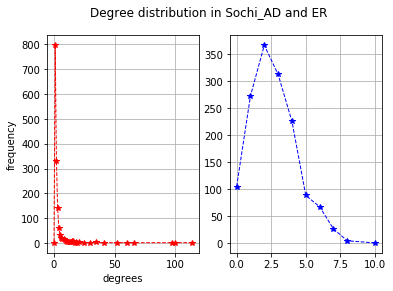

In [90]:
plt.suptitle('Degree distribution in Sochi_AD and ER')
plt.subplot(121)
plt.plot(baseAD,AD ,'r*--', linewidth=1)
plt.xlabel ('degrees',fontsize=10)
plt.ylabel('frequency',fontsize=10)
plt.grid(True)
plt.subplot(122)
plt.plot(baseER1,ER1, 'b*--', linewidth=1)
plt.tick_params(axis='both',labelsize=10)
plt.grid(True)
plt.show()


In [571]:
degree_sequence_ER2 = sorted(ER2.degree(), key=lambda x: x[1], reverse=True)
#degree_sequence_ER2

In [572]:
degree_sequence_ER3 = sorted(ER3.degree(), key=lambda x: x[1], reverse=True)
#degree_sequence_ER3

In [573]:
# Clustering coefficient of all nodes (in a dictionary) 
clust_coefficients = nx.clustering(G_s_ad)
# Or use directly the built-in method
print (nx.average_clustering(G_s_ad))


0.037943014585357954


In [574]:
# Clustering coefficient of all nodes (in a dictionary) 
clust_coefficients_ER1 = nx.clustering(ER1)
# Or use directly the built-in method
print (nx.average_clustering(ER1))

0.00012437810945273634


In [575]:
# Clustering coefficient of all nodes (in a dictionary) 
clust_coefficients_ER2 = nx.clustering(ER2)
# Or use directly the built-in method
print (nx.average_clustering(ER2))

0.0018656716417910452


In [576]:
# Clustering coefficient of all nodes (in a dictionary) 
clust_coefficients_ER3 = nx.clustering(ER3)
# Or use directly the built-in method
print (nx.average_clustering(ER3))

0.0021354267622924338


In [577]:
print((nx.average_clustering(ER1)+nx.average_clustering(ER2)+nx.average_clustering(ER3))/3)

0.0013751588378454048


In [578]:
a=nx.pagerank(G_s_ad, alpha=0.9)
s = sorted(a.items(), key=lambda x: x[1], reverse=True)

#for k, v in s:
   # print(k, v)
#average of pagerank for real AD network
p=0
for d in a.values():
    p=p+d
print('Average of pagerank for AD_real',p/len(a))     

Average of pagerank for AD_real 0.0006784260515603843


In [579]:
b1=nx.pagerank(ER1, alpha=0.9)
d1= sorted(b1.items(), key=lambda x: x[1], reverse=True)

#for k, v in d:
    #print(k, v)
#average of pagerank for real AD network
p1=0
for d in a.values():
    p1=p1+d
AvePageRank_ER1= p1/len(b1)   
print('Average of pagerank for AD_ER1',AvePageRank_ER1)     

Average of pagerank for AD_ER1 0.0006784260515603843


In [580]:
b2=nx.pagerank(ER2, alpha=0.9)
d2 = sorted(b2.items(), key=lambda x: x[1], reverse=True)

#for k, v in d:
    #print(k, v)
#average of pagerank for real AD network
p2=0
for d in a.values():
    p2=p2+d
AvePageRank_ER2= p2/len(b2)   
print('Average of pagerank for AD_ER2',AvePageRank_ER2) 

Average of pagerank for AD_ER2 0.0006784260515603843


In [581]:
b3=nx.pagerank(ER3, alpha=0.9)
d3 = sorted(b3.items(), key=lambda x: x[1], reverse=True)

#for k, v in d:
    #print(k, v)
#average of pagerank for real AD network
p3=0
for d in b3.values():
    p3=p3+d
AvePageRank_ER3= p3/len(b3)   
print('Average of pagerank for AD_ER3',AvePageRank_ER3)  

Average of pagerank for AD_ER3 0.0006784260515603801


In [582]:
print((AvePageRank_ER3+AvePageRank_ER2+AvePageRank_ER1)/3)

0.0006784260515603829


In [583]:
density = nx.density(G_s_ad)
print("Network density for AD:", density)

Network density for AD: 0.0018146630299714168


In [584]:
density1 = nx.density(ER1)
print("Network density for ER1 :", density1)

Network density for erdos : 0.001815584178717595


In [585]:
density2 = nx.density(ER2)
print("Network density for ER2 :", density2)

Network density for erdos : 0.001820189922448487


In [586]:
density3 = nx.density(ER3)
print("Network density for ER3 :", density3)

Network density for erdos : 0.001817426476209952


In [587]:
#Average density for three ERs
print((density3+density3+density3)/3)

0.001817426476209952


In [588]:
# nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G_s_ad)
largest_component = max(components, key=len)
#largest_component
components
# returns number of different connected components 
print('number of connected component in G_s_ad',nx.number_connected_components(G_s_ad)) 
print('length of largest component',len(largest_component))

number of connected component in G_s_ad 103
length of largest component 1237


In [589]:
# nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(ER1)
largest_component = max(components, key=len)
#largest_component
components
# returns number of different connected components 
print('number of connected component in ER1',nx.number_connected_components(ER1)) 
print('length of largest component in ER1',len(largest_component))

number of connected component in ER1 118
length of largest component in ER1 1342


In [590]:
# nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(ER2)
largest_component = max(components, key=len)
#largest_component
components
# returns number of different connected components 
print('number of connected component in erdos2',nx.number_connected_components(ER2)) 
print('length of largest component in ER2', len(largest_component))

number of connected component in erdos2 113
length of largest component in ER2 1345


In [591]:
# nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(ER3)
largest_component = max(components, key=len)
#largest_component
components
# returns number of different connected components 
print('number of connected component in erdos3',nx.number_connected_components(ER3)) 
print('length of largest component in ER3', len(largest_component))

number of connected component in erdos3 127
length of largest component in ER3 1332


In [592]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] <= valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

   

In [598]:
#copy ERs and Sochi_ad
G_s_ad_first_remove_nodes = G_s_ad.copy()
ER1_first_remove_nodes = ER1.copy()
ER2_first_remove_nodes=ER2.copy()
ER3_first_remove_nodes=ER3.copy()

In [599]:
#create dict from nodes of new graphs
degree_dict_New_G_s_ad = dict(G_s_ad_first_remove_nodes.degree(G_s_ad_first_remove_nodes.nodes()))
degree_dict_New_ER1 = dict(ER1_first_remove_nodes.degree(ER1_first_remove_nodes.nodes()))
degree_dict_New_ER2 = dict(ER2_first_remove_nodes.degree(ER2_first_remove_nodes.nodes()))
degree_dict_New_ER3 = dict(ER3_first_remove_nodes.degree(ER3_first_remove_nodes.nodes()))


In [600]:
sorted_degree_New_AD = sorted(degree_dict_New_G_s_ad.items(), key=itemgetter(1), reverse=True)
sorted_degree_New_ER1 = sorted(degree_dict_New_ER1.items(), key=itemgetter(1), reverse=True)
sorted_degree_New_ER2 = sorted(degree_dict_New_ER2.items(), key=itemgetter(1), reverse=True)
sorted_degree_New_ER3 = sorted(degree_dict_New_ER3.items(), key=itemgetter(1), reverse=True)


In [601]:
#sorted_degree_New_ER3

In [602]:
#Do the removal nodes of new graphs
G_s_ad_first_remove_nodes.remove_nodes_from(getKeysByValue(degree_dict_New_G_s_ad,5))
ER1_first_remove_nodes.remove_nodes_from(getKeysByValue(degree_dict_New_ER1,5))
ER2_first_remove_nodes.remove_nodes_from(getKeysByValue(degree_dict_New_ER2,5))
ER3_first_remove_nodes.remove_nodes_from(getKeysByValue(degree_dict_New_ER3,5))

In [603]:
print(nx.info(G_s_ad_first_remove_nodes))

Name: 
Type: Graph
Number of nodes: 114
Number of edges: 306
Average degree:   5.3684


In [604]:
print(nx.info(ER1_first_remove_nodes))

Name: 
Type: Graph
Number of nodes: 101
Number of edges: 60
Average degree:   1.1881


In [605]:
print(nx.info(ER2_first_remove_nodes))

Name: 
Type: Graph
Number of nodes: 95
Number of edges: 47
Average degree:   0.9895


In [606]:
print(nx.info(ER3_first_remove_nodes))

Name: 
Type: Graph
Number of nodes: 89
Number of edges: 41
Average degree:   0.9213


In [607]:
# nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G_s_ad_first_remove_nodes)
largest_component = max(components, key=len)
#largest_component
components
# returns number of different connected components 
print('number of connected component in G_s_ad_first_remove_nodes',nx.number_connected_components(G_s_ad_first_remove_nodes)) 
print('length of largest component in G_s_ad_first_remove_nodes ',len(largest_component))

number of connected component in G_s_ad_first_remove_nodes 1
length of largest component in G_s_ad_first_remove_nodes  114


In [608]:
# nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(ER1_first_remove_nodes)
largest_component = max(components, key=len)
#largest_component
components
# returns number of different connected components 
print('number of connected component in ER1_first_remove_nodes',nx.number_connected_components(ER1_first_remove_nodes)) 
print('length of largest component in ER1_first_remove_nodes ',len(largest_component))

number of connected component in ER1_first_remove_nodes 41
length of largest component in ER1_first_remove_nodes  27


In [609]:
# nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(ER2_first_remove_nodes)
largest_component = max(components, key=len)
#largest_component
components
# returns number of different connected components 
print('number of connected component in ER2_first_remove_nodes',nx.number_connected_components(ER2_first_remove_nodes)) 
print('length of largest component in ER2_first_remove_nodes ',len(largest_component))

number of connected component in ER2_first_remove_nodes 48
length of largest component in ER2_first_remove_nodes  24


In [610]:
# nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(ER3_first_remove_nodes)
largest_component = max(components, key=len)
#largest_component
components
# returns number of different connected components 
print('number of connected component in ER3_first_remove_nodes',nx.number_connected_components(ER3_first_remove_nodes)) 
print('length of largest component in ER3_first_remove_nodes ',len(largest_component))

number of connected component in ER3_first_remove_nodes 48
length of largest component in ER3_first_remove_nodes  7


In [611]:
print(nx.average_clustering(G_s_ad_first_remove_nodes))

0.09319623957476326


In [612]:
print((nx.average_clustering(ER1_first_remove_nodes)+nx.average_clustering(ER2_first_remove_nodes)+nx.average_clustering(ER3_first_remove_nodes))/3)

0.0


In [613]:
AD_Nodes=[797,1128,1268,1328,1360,1380,1369]

In [544]:
AD_No_Component=[724,881,850,808,758,719,666]

In [515]:
AD_Lengh_Component=[2,5,10,12,30,34,90]

In [516]:
ER_Nodes=[382,738,1059,1278,1379,1441,1464]

In [517]:
ER_No_Component=[371,608,572,294,181,137,123]

In [518]:
ER_Lengh_Component=[2,4,21,790,1143,1282,1324]

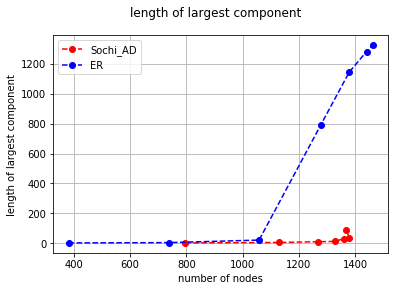

In [519]:
plt.suptitle('length of largest component')
plt.plot(AD_Nodes,AD_Lengh_Component, 'ro--',ER_Nodes, ER_Lengh_Component,'bo--')
plt.xlabel('number of nodes')
plt.ylabel('length of largest component')
plt.grid(True)
plt.legend(['Sochi_AD','ER'])


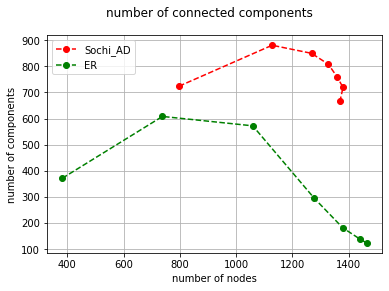

In [520]:
plt.suptitle('number of connected components')
plt.plot(AD_Nodes,AD_No_Component,'ro--',ER_Nodes,ER_No_Component,'go--')
plt.xlabel('number of nodes')
plt.ylabel('number of components')
plt.grid(True)
plt.legend(['Sochi_AD','ER'])

In [92]:
AD_Nodes_start_low=[61,77,94,114,146,206,346,677,1474]

In [93]:
AD_SizeLargeComponent=[60,76,94,114,145,204,339,638,1237]

In [94]:
AD_NoComponent_start_low=[2,2,1,1,2,3,7,30,103]

In [95]:
AD_Ave_Clustring=[0.086,0.094,0.121,0.094,0.076,0.089,0.068,0.096,0.038]

In [96]:
ER_Nodes_start_low=[1,10,32,95,196,415,736,1190,1369]

In [97]:
ER_SizeLargeComponent=[1,2,5,19,138,386,729,1177,1340]

In [98]:
ER_NoComponent_start_low=[1,8,22,46,42,23,8,8,15]

In [99]:
ER_Ave_Clustring=[0,0,0,0,0.0026,0.0018,0.0019,0.0017,0.0014]

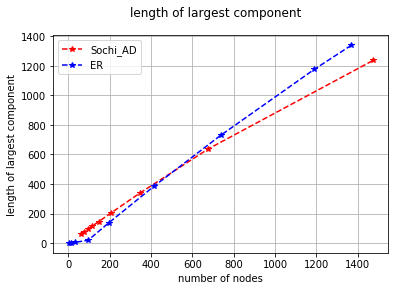

In [100]:
plt.suptitle('length of largest component')
plt.plot(AD_Nodes_start_low,AD_SizeLargeComponent, 'r*--',ER_Nodes_start_low, ER_SizeLargeComponent,'b*--')
plt.xlabel('number of nodes')
plt.ylabel('length of largest component')
plt.grid(True)
plt.legend(['Sochi_AD','ER'])

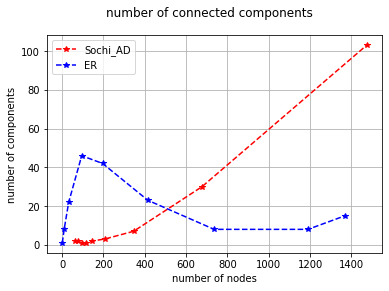

In [101]:
plt.suptitle('number of connected components')
plt.plot(AD_Nodes_start_low,AD_NoComponent_start_low,'r*--',ER_Nodes_start_low,ER_NoComponent_start_low,'b*--')
plt.xlabel('number of nodes')
plt.ylabel('number of components')
plt.grid(True)
plt.legend(['Sochi_AD','ER'])

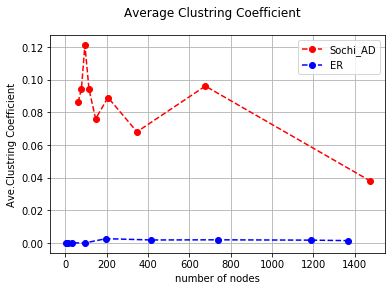

In [102]:
plt.suptitle('Average Clustring Coefficient')
plt.plot(AD_Nodes_start_low,AD_Ave_Clustring,'ro--',ER_Nodes_start_low,ER_Ave_Clustring,'bo--')
plt.xlabel('number of nodes')
plt.ylabel('Ave.Clustring Coefficient')
plt.grid(True)
plt.legend(['Sochi_AD','ER'])